# Euchre
Goal: code up a playable euchre game to better understand winning probabilities of different starting hands  
Given: Right, Ace, Queen, off Ace, off ten; 3-suited, dealer spot - what's the likelihood of winning each number of tricks that round?  
Genetic Algorithm to determine next play would be cool - start with random strategy, adapt to new weights as games progress  
Streamlit app where user can select cards in hand and table position and get breakdown of likelihood of taking 5/4/3/2/1/0 tricks

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import sys

sys.path.insert(0, 'C:/Users/jerem/Desktop/nonsense/euchre/')

In [2]:
from utils import EuchreGame

### Create Game object, check attributes

In [3]:
euchre_game = EuchreGame()

In [5]:
# create show_all_game_attributes method?
euchre_game.score

{'t1': 0, 't2': 0}

In [6]:
euchre_game.dealer

'p1'

In [7]:
euchre_game.next_to_deal

['p2', 'p3', 'p4', 'p1']

In [8]:
euchre_game.print_score()

Current score: 0-0


In [9]:
euchre_game.card_suits

['S', 'C', 'H', 'D']

In [10]:
euchre_game.card_values

['A', 'K', 'Q', 'J', 'T', '9']

In [11]:
deck_of_cards = euchre_game.shuffle_deck_of_cards()
for card in deck_of_cards:
    print(card, end=',')

9_S,9_C,9_H,9_D,T_S,T_C,T_H,T_D,J_S,J_C,J_H,J_D,Q_S,Q_C,Q_H,Q_D,K_S,K_C,K_H,K_D,A_S,A_C,A_H,A_D,

### Deal cards

In [12]:
player_hands, card_flipped_up = euchre_game.deal_hand()

In [13]:
player_hands

{'p1': ['T_S', '9_D', 'T_D', 'J_H', 'T_H'],
 'p2': ['J_D', 'K_H', 'J_S', 'K_D', 'Q_D'],
 'p3': ['Q_H', 'A_S', 'A_D', '9_S', 'J_C'],
 'p4': ['9_C', 'Q_S', 'K_C', 'K_S', 'Q_C']}

In [14]:
card_flipped_up

'9_H'

### Choose suit for trump

In [15]:
if euchre_game.eval_flipped_card(suit='S', hand=['K_S', 'A_H', 'A_C', 'J_C', 'J_S']):
    print('order up trump')

In [16]:
if euchre_game.eval_flipped_card(suit='S', hand=['K_S', 'A_H', 'A_S', 'J_C', 'J_S']):
    print('order up trump')

order up trump


In [17]:
euchre_game.choose_open_trump(hand=['K_S', 'A_S', 'A_C', 'J_C', 'J_S'], 
                  card_flipped_up='A_D')

'S'

In [18]:
euchre_game.choose_open_trump(hand=['K_S', 'A_H', 'A_C', 'J_C', 'J_S'], 
                  card_flipped_up='A_D')

In [19]:
calling_player, trump = euchre_game.determine_trump(card_flipped_up=card_flipped_up,
                           player_hands=player_hands)

In [20]:
print(player_hands)
print(calling_player)
print(trump)

{'p1': ['T_S', '9_D', 'T_D', 'J_H', 'T_H'], 'p2': ['J_D', 'K_H', 'J_S', 'K_D', 'Q_D'], 'p3': ['Q_H', 'A_S', 'A_D', '9_S', 'J_C'], 'p4': ['9_C', 'Q_S', 'K_C', 'K_S', 'Q_C']}
p2
D


### Play trick

In [21]:
cards_in_play, player_led = euchre_game.play_trick(player_hands=player_hands, 
                                                   trump=trump, 
                                                   next_to_play_list=euchre_game.next_to_deal, 
                                                   cards_played_this_hand = [], 
                                                   verbose=True)

Player p2 plays J_D, Following suit- Player p3 plays A_D, Lowest_card_in_hand- Player p4 plays 9_C, Following suit- Player p1 plays 9_D, 

In [22]:
cards_in_play

{'p2': 'J_D', 'p3': 'A_D', 'p4': '9_C', 'p1': '9_D'}

In [23]:
player_led

'p2'

#### Determine trick winner

In [24]:
euchre_game.determine_trick_winner(cards_in_play={'p2': '9_S', 'p3': 'J_C', 'p4': 'J_H', 'p1': 'A_S'}, 
                           trump='S', 
                           player_led=player_led, 
                                   verbose=True)

p3 wins trick


'p3'

In [25]:
euchre_game.determine_trick_winner(cards_in_play={'p2': '9_S', 'p3': 'J_C', 'p4': 'J_S', 'p1': 'A_S'}, 
                           trump='D', 
                           player_led=player_led, 
                                   verbose=False)

'p1'

In [26]:
trick_winner = euchre_game.determine_trick_winner(cards_in_play=cards_in_play,
                                           trump=trump,
                                           player_led=player_led)

trick_winner

'p2'

In [27]:
euchre_game.determine_trick_winner(cards_in_play={'p2': '9_S', 'p3': 'J_H', 'p4': 'J_S', 'p1': 'A_D'}, 
                           trump='D', 
                           player_led='p2', 
                                   verbose=False)

'p3'

In [28]:
euchre_game.determine_trick_winner(cards_in_play={'p2': '9_S', 'p3': 'T_D', 'p4': 'J_S', 'p1': 'A_D'}, 
                           trump='D', 
                           player_led='p2', 
                                   verbose=False)

'p1'

#### Swap card in dealer hand

In [29]:
new_dealer_hand = euchre_game.swap_dealer_card(card_flipped_up='A_S', dealer_hand=['J_H', 'A_D', '9_H', 'K_S', 'J_D'], 
                                               verbose=True)
new_dealer_hand

Dealer discards 9_H and picks up A_S


['J_H', 'A_D', 'K_S', 'J_D', 'A_S']

In [30]:
new_dealer_hand = euchre_game.swap_dealer_card(card_flipped_up='9_S', dealer_hand=['J_H', 'T_D', 'T_H', 'K_S', 'J_D'], 
                                               verbose=True)
new_dealer_hand

Dealer discards T_D and picks up 9_S


['J_H', 'T_H', 'K_S', 'J_D', '9_S']

### Play card

In [36]:
euchre_game.play_card(hand=['J_H', 'A_D', '9_H', 'K_S', 'J_D'], 
                      trump='S',
                      cards_in_play={'p2': 'J_D', 'p3': 'A_D', 'p1': '9_D'}, 
                      player_led='p1',
                      cards_played_this_hand=[], 
                      suit_led='D')

'J_D'

In [37]:
euchre_game.play_card(hand=['J_H', 'A_D', '9_H', 'K_S', 'J_D'], 
                      trump='D',
                      cards_in_play={'p2': 'J_D', 'p3': 'A_D', 'p1': '9_D'}, 
                      player_led='p1',
                      cards_played_this_hand=[], 
                      suit_led='D')

'J_D'

#### Play lead card

In [123]:
euchre_game.play_lead_card(hand=['9_D', 'T_C', '9_C', 'A_S', 'A_C'], 
               trump='S', 
               cards_played_this_hand=['J_S', 'J_C'])

'A_S'

In [124]:
euchre_game.play_lead_card(hand=['T_D', 'T_C', 'Q_C', 'A_D', 'A_C'], 
               trump='S', 
               cards_played_this_hand=['J_S', 'J_C'])

'A_D'

In [40]:
from utils import play_random_card

In [41]:
play_random_card(hand=['9_D', 'T_C', '9_C', 'J_S', 'A_C'], 
                             suit_led=None)

'J_S'

In [42]:
play_random_card(hand=['9_D', 'T_C', '9_C', 'J_S', 'A_C'], 
                             suit_led='D')

'9_D'

In [43]:
play_random_card(hand=['9_D', 'T_C', '9_C', 'J_S', 'A_C'], 
                             suit_led='C')

'T_C'

In [52]:
from utils import get_lowest_card

In [53]:
get_lowest_card(hand=['9_D', 'T_C', '9_C', 'J_S', 'A_C'], 
                suit='C')

'9_C'

In [54]:
get_lowest_card(hand=['9_D', 'T_C', '9_C', 'J_S', 'A_C'], 
                suit='H')

'9_D'

In [55]:
get_lowest_card(hand=['A_D', 'T_C', '9_C', 'J_S', 'A_C'], 
                suit='D')

'A_D'

In [56]:
get_lowest_card(hand=['A_D', 'T_C', '9_C', 'J_S', 'A_C'])

'9_C'

In [57]:
get_lowest_card(hand=['A_D', 'T_C', 'T_H', 'J_S', 'A_C'])

'T_C'

In [73]:
cards_in_play = {}

In [74]:
len(cards_in_play)

0

### Play full game

In [217]:
%%time

euchre_game = EuchreGame()
euchre_game.play_full_game(verbose=True)

Hand #0- Dealer: p1; Card flipped up: 9_C
Player hands: {'p1': ['Q_D', 'T_H', 'Q_C', 'A_C', 'J_D'], 'p2': ['A_D', 'Q_S', 'K_C', 'A_H', 'T_S'], 'p3': ['9_S', 'Q_H', '9_D', 'T_C', 'J_C'], 'p4': ['J_H', 'K_S', 'K_H', 'K_D', 'J_S']}
Trump not found
Hand #0- Dealer: p2; Card flipped up: 9_S
Player hands: {'p1': ['T_D', 'K_C', 'T_C', 'T_H', 'A_C'], 'p2': ['9_H', 'K_H', 'Q_C', 'J_H', 'A_D'], 'p3': ['9_C', 'J_D', 'Q_S', 'J_C', 'A_S'], 'p4': ['T_S', '9_D', 'K_D', 'J_S', 'K_S']}
Player p4 has chosen S as trump
Dealer discards 9_H and picks up 9_S
Leading off with highest non-trump- Player p3 plays J_D, Following suit with lowest card- Player p4 plays 9_D, Following suit with lowest card- Player p1 plays T_D, Following suit with lowest card- Player p2 plays A_D, p2 wins trick
Leading off with highest non-trump- Player p2 plays K_H, Lowest_trump_card- Player p3 plays Q_S, Lowest_trump_card- Player p4 plays T_S, Following suit with lowest card- Player p1 plays T_H, p3 wins trick
Leading off with hi

In [424]:
euchre_game.score

{'t1': 10, 't2': 6}

#### Collect all hands results

In [386]:
euchre_game = EuchreGame()
hand_results = euchre_game.play_full_game(return_all_hands_results=True, verbose=False)
hand_results[0:3]

[None,
 {'player_hands': {'p1': ['A_H', '9_H', 'Q_S', 'T_C', '9_C'],
   'p2': ['A_D', 'K_D', '9_D', 'T_D', 'T_H'],
   'p3': ['J_H', 'J_S', '9_S', 'K_H', 'A_S'],
   'p4': ['J_C', 'A_C', 'T_S', 'K_C', 'Q_H']},
  'calling_player': 'p2',
  'trump': 'D',
  'dealer': 'p2',
  'hand_score': {'t1': 0, 't2': 1},
  'trick_winners': {'p3': 1, 'p4': 0, 'p1': 0, 'p2': 4}},
 None]

In [316]:
len(hand_results)

10

#### Profile performance

In [186]:
%%prun

euchre_game = EuchreGame()
euchre_game.play_full_game(verbose=False)

### Loop through games played, collect strategy results

In [196]:
%%time

N_GAMES_TO_PLAY = 100

strategy_results = {'t1_wins':0}

for i in range(N_GAMES_TO_PLAY):
    euchre_game = EuchreGame()
    euchre_game.team_strategies['t2'] = 'random'  # set team 2 strategy to random
    euchre_game.play_full_game(verbose=False)
    if euchre_game.score['t1'] > euchre_game.score['t2']:
        strategy_results['t1_wins'] += 1
    strategy_results['t1_score'] = euchre_game.score['t1']
    strategy_results['t2_score'] = euchre_game.score['t2']

Wall time: 801 ms


In [208]:
strategy_results

{'t1_wins': 75, 't1_score': 10, 't2_score': 4}

### Loop through games played, collect hand_results

In [136]:
import pandas as pd

In [143]:
from utils import return_off_suit

In [175]:
%%time

N_GAMES_TO_PLAY = 100

all_hand_results = []
games_played = 0
t1_wins = 0
for i in range(N_GAMES_TO_PLAY):
    euchre_game = EuchreGame()
    hand_results = euchre_game.play_full_game(return_all_hands_results=True, verbose=False)
    games_played += 1
    if euchre_game.score['t1'] > euchre_game.score['t2']:
        t1_wins += 1
    all_hand_results.append(hand_results)

Wall time: 697 ms


In [176]:
all_hand_results[0][0]

{'player_hands': {'p1': ['9_D', 'T_C', 'K_D', 'K_H', '9_H'],
  'p2': ['J_D', '9_S', 'A_H', 'A_C', 'Q_S'],
  'p3': ['Q_H', 'T_S', 'T_D', 'J_S', 'A_S'],
  'p4': ['Q_D', 'K_S', 'Q_C', 'J_C', 'T_H']},
 'calling_player': 'p3',
 'trump': 'S',
 'dealer': 'p3',
 'hand_score': {'t1': 0, 't2': 2},
 'trick_winners': {'p4': 2, 'p1': 0, 'p2': 1, 'p3': 2}}

In [177]:
def return_df_from_hand_results(hand_results_dict):
    fields_to_collect = ['tricks_won',
                         'is_calling_player',
                         'has_right', 
                         'has_left',
                         'has_Atrump',
                         'has_Ktrump',
                         'has_Qtrump',
                         'num_trump',
                         'num_off_A',
                         'num_off_K',
                         'num_off_Q']
    results_list = []
    for player in hand_results_dict['trick_winners'].keys():
        player_hand_results = dict.fromkeys(fields_to_collect,0)
        player_hand_results['tricks_won'] = hand_results_dict['trick_winners'][player]
        if player == hand_results_dict['calling_player']:
            player_hand_results['is_calling_player'] = 1
        player_hand_results['num_trump'] = 0
        for idx, card in enumerate(hand_results_dict['player_hands'][player]):
            if card[-1] == hand_results_dict['trump']:
                player_hand_results['num_trump'] += 1
                if card[0] == 'A':
                    player_hand_results['has_Atrump'] = 1
                if card[0] == 'K':
                    player_hand_results['has_Ktrump'] = 1
                if card[0] == 'Q':
                    player_hand_results['has_Qtrump'] = 1
                if card[0] == 'J':
                    player_hand_results['has_right'] = 1
            else:
                if card[0] == 'A':
                    player_hand_results['num_off_A'] += 1
                if card[0] == 'K':
                    player_hand_results['num_off_K'] += 1
                if card[0] == 'Q':
                    player_hand_results['num_off_Q'] += 1
                if card[0] == 'J':
                    if return_off_suit(card[-1]) == trump:
                        player_hand_results['has_left'] = 1
                        player_hand_results['num_trump'] += 1
        results_list.append(player_hand_results)
    return pd.DataFrame(results_list)

In [178]:
results_df = return_df_from_hand_results(all_hand_results[0][0])
results_df.shape

(4, 11)

In [179]:
results_df.head()

,tricks_won,is_calling_player,has_right,has_left,has_Atrump,has_Ktrump,has_Qtrump,num_trump,num_off_A,num_off_K,num_off_Q
0,2,0,0,0,0,1,0,1,0,0,2
1,0,0,0,0,0,0,0,0,0,2,0
2,1,0,0,0,0,0,1,2,2,0,0
3,2,1,1,0,1,0,0,3,0,0,1


In [180]:
%%time

N_GAMES_TO_PLAY = 100

all_hand_results_df = pd.DataFrame()
for i in range(N_GAMES_TO_PLAY):
    euchre_game = EuchreGame()
    hand_results = euchre_game.play_full_game(return_all_hands_results=True, verbose=False)
    game_results_df = pd.DataFrame()
    for hand in hand_results:
        hand_results_df = return_df_from_hand_results(hand)
        game_results_df = pd.concat([game_results_df, hand_results_df])
    all_hand_results_df = pd.concat([all_hand_results_df, game_results_df])

Wall time: 2.34 s


In [181]:
all_hand_results_df.shape

(5028, 11)

In [182]:
all_hand_results_df.sort_values('tricks_won', ascending=False).head(10)

,tricks_won,is_calling_player,has_right,has_left,has_Atrump,has_Ktrump,has_Qtrump,num_trump,num_off_A,num_off_K,num_off_Q
0,5,1,1,0,1,0,1,3,1,0,0
0,5,1,1,0,1,0,0,3,0,1,0
0,5,1,1,0,0,0,1,3,0,1,0
0,5,1,1,0,0,0,1,3,1,1,0
2,5,1,0,0,1,1,1,3,1,0,0
3,5,1,1,0,1,1,0,3,1,0,0
3,5,1,1,0,1,1,0,4,1,0,0
0,5,1,1,0,0,0,0,3,1,1,0
0,5,1,1,0,0,1,1,3,1,0,0
3,5,1,1,0,0,1,0,3,1,0,0


In [183]:
# check hand with right bauer didn't take 0 tricks
assert all_hand_results_df[(all_hand_results_df['tricks_won']==0) & (all_hand_results_df['has_right']==1)].shape[0] == 0

In [185]:
all_hand_results_df.groupby(['has_right', 
                             'has_left', 
                            'has_Atrump', 
                            'has_Ktrump', 
                            # 'has_Qtrump',
                            ]).agg(avg_tricks=('tricks_won', 'mean'), num_hands=('has_right','count'))

avg_tricks  num_hands
has_right has_left has_Atrump has_Ktrump                       
0         0        0          0             0.538159       2031
                              1             1.209804        510
                   1          0             1.356164        511
                              1             2.339056        233
          1        0          0             0.723542        463
                              1             1.145161         62
                   1          0             1.507042         71
                              1             2.565217         23
1         0        0          0             1.922619        504
                              1             2.837209        215
                   1          0             3.166667        186
                              1             3.333333         78
          1        0          0             2.000000         86
                              1             2.869565         23
                   1          0             2.833333         24
                              1             3.875000          8

<AxesSubplot:>

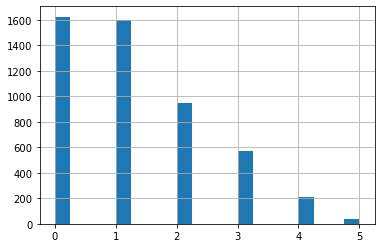

In [174]:
all_hand_results_df['tricks_won'].hist(bins=20)

### Next steps for development

In [ ]:
# Build out play card strategy
    # add logic to check what cards have been played in hand so far
        # update cards_played_this_hand to dict to be able to tell which players played which cards
        # check what trump has been played, etc., if highest remain 
# Build out framework to evaluate statistical significance of different strategies
    # chart overlapping histograms of points scored for different strategies across hands
# Handle loners
    # add functionality to determine trump to check loner strategy, return loner_called boolean to play_hand
        # start with strategy to call loner when right/left and 4 total trump
    # update play_trick to pass in loner_called, remove partner of calling_player from next_to_play_list
    # update update_score function to take in loner_called parameter, return scores for loners
# Evaluate points scored for each hand type for each game
# Build advanced strategy for play_lead_card function to reduce number of suits in hand, play toward partner short-suits
# Build model to predict tricks taken from all_hand_results_df as training data set
# build out advanced strategy for dealer swapping out card_flipped_up to reduce number of suits in hand
# Code cleanup
    # Add README
    # Add tests to all functions

# Look into bug where player has top 4 trump cards but takes < 4 tricks

# Look at combinations of exactly unique hands, vs. unique types of hands

# BUG! Left bauer is still being considered their original suit when following suit